In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pymp
import time
import multiprocessing as mp
from numba import jit, njit 

# Lista 5 de Métodos Computacionais da Astronomia
## Aluno: Thiago Laidler Vidal Cunha 

	1- [Erro padrão]

* Carregando as imagens na array e testando a velocidade de paralelização em cada thread para saber qual a mais eficiente pra ser usada depois

16.326289176940918
8.050147294998169
7.717703819274902
7.126756429672241
6.956928968429565
7.101117849349976
7.064377307891846
7.049072742462158
7.029537677764893
7.075727701187134
7.047199249267578
7.122194528579712
7.987630367279053
7.331090927124023
7.10146689414978
7.118375539779663


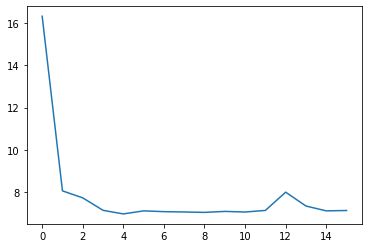

In [2]:
cron = np.zeros(16)
array_img = pymp.shared.array((512,128,128), dtype='float64')
for threads in range(1,16+1):
    start = time.time()
    array_img = pymp.shared.array((512,128,128), dtype='float64')
    with pymp.Parallel(threads) as p:  # alterando o numero de thread simultaneas usadas. Comparando o tempo.
        for index in p.range(0, 512):
            array_img[index] = np.loadtxt(f'./ccd/ccd{index+1}.dat')
    end = time.time()
    print(end-start)
    cron[threads-1] = end-start
plt.plot(cron)
plt.show()
#No meu caso, utilizar 5 threads é mais  eficiente

Tempo rodado: 88.65637946128845


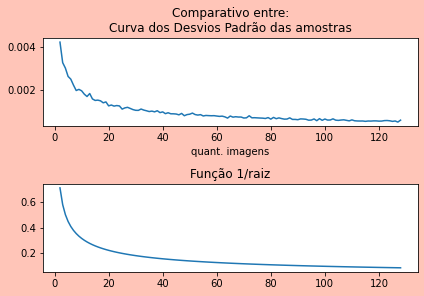

In [3]:
from time import time #Cronometrar e verificar a eficiencia
num_imgs = np.arange(2, 128+1, 1) #num de imagens em cada amostra
media_imgs = np.zeros(256) #media das amostras
dp_imgs = pymp.shared.array((num_imgs.size), dtype='float64') #paralelização --> alocando pro d.p. das imagens
start = time()
with pymp.Parallel(5) as p: #5 para mais eficiencia
    for n in p.range(num_imgs.size):
        for i in range(256): #sorteando as amostras
            media_imgs[i] = np.mean(array_img[np.random.randint(512, size=num_imgs[n])]) #selecionando a media de cada amostra
        dp_imgs[n] = np.std(media_imgs) #calculando desvio padrão
end = time()
print('Tempo rodado: '+str(end-start))

#Arrumando função raiz para comparar
aloc = np.zeros(num_imgs.size)
for i in range(num_imgs.size +1, 1 , -1):
    aloc[i-2] = 1/np.sqrt(i)

plt.figure(facecolor = '#ffc5b8',figsize=(6,6))
sp1 = plt.subplot(3,1,1)
plt.plot(num_imgs, dp_imgs)
plt.title('Comparativo entre:\nCurva dos Desvios Padrão das amostras')
plt.xlabel('quant. imagens')

sp2 = plt.subplot(3,1,2)
plt.plot(num_imgs, aloc)
plt.title('Função 1/raiz')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Erro padrão')

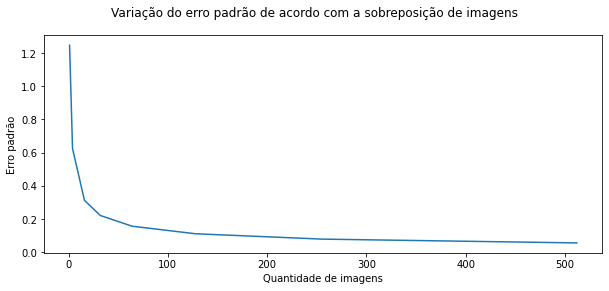

In [4]:
dp_pop = np.std(array_img) #desvio padrão da população
nimg = [1, 4, 16, 32, 64, 128, 256, 512]
erro_padrao = np.array([dp_pop*(np.sqrt(n))**(-1) for n in nimg])


plt.figure(figsize=(10,4))
plt.plot(nimg, erro_padrao)
plt.suptitle('Variação do erro padrão de acordo com a sobreposição de imagens')
plt.xlabel('Quantidade de imagens')
plt.ylabel('Erro padrão')

<ipython-input-5-047409efc77b>:9: RuntimeWarning: covariance is not positive-semidefinite.
  x, y = np.random.multivariate_normal(mean, cov, 4500).T #Gerando pontos no espaço. arquivo bidimensional.


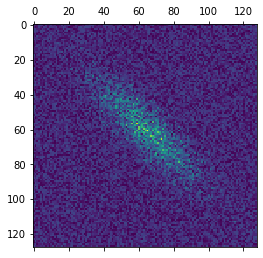


Após reduzido o ruído, seguindo mesma lógica do erro padrão



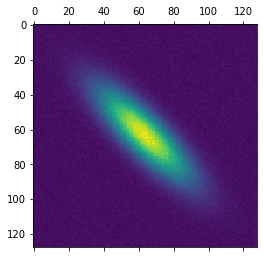

In [5]:
##Determinando a média, covariança, quantidade das imagens, resolução e soma das imgs
mean = [0, 0]
cov = [[1*8, 0], [7*8, 4*8]]
nimages = 512
res = 128
images = np.zeros((nimages,res,res))
simgs=(np.sum(array_img, axis=0))
for i in range(nimages):
    x, y = np.random.multivariate_normal(mean, cov, 4500).T #Gerando pontos no espaço. arquivo bidimensional.
    counts, xedges, yedges = np.histogram2d(x, y, bins=res) #contagem por pixel, dado a resolução. Seguindo os pts.
    noise = ((np.random.random(res*res)-0.5)*3).reshape([res,res])
    counts = counts + noise
    images[i] = counts
plt.matshow(counts)
plt.show()
print('\nApós reduzido o ruído, seguindo mesma lógica do erro padrão\n')
plt.matshow(np.sum(images,axis=0)/images.shape[0])
plt.show()

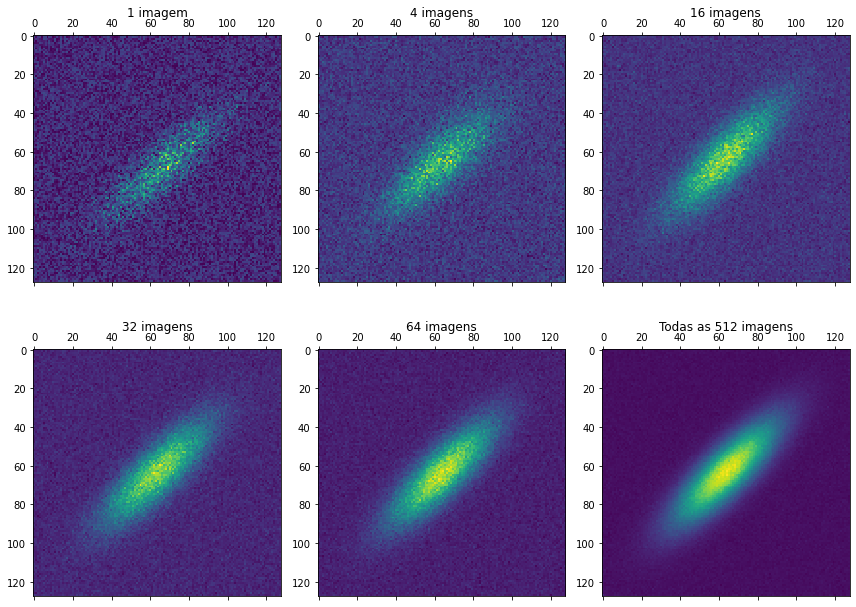

In [6]:
## Organizando a sobreposição das imagens na ordem pedida
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,9))
axes[0,0].matshow(array_img[np.random.randint(512)])
axes[0,0].set_title('1 imagem')
axes[0,1].matshow(np.sum(array_img[np.random.randint(512, size=4)], axis=0)/4)
axes[0,1].set_title('4 imagens')
axes[0,2].matshow(np.sum(array_img[np.random.randint(512, size=16)], axis=0)/16)
axes[0,2].set_title('16 imagens')
axes[1,0].matshow(np.sum(array_img[np.random.randint(512, size=32)], axis=0)/32)
axes[1,0].set_title('32 imagens')
axes[1,1].matshow(np.sum(array_img[np.random.randint(512, size=64)], axis=0)/64)
axes[1,1].set_title('64 imagens')
axes[1,2].matshow(simgs/512)
axes[1,2].set_title('Todas as 512 imagens')

plt.tight_layout()
plt.show()

> Em situações como quando há ruído interferindo no sinal, é interessante
> sobrepor as imagens. A vantagem deste procedimento, em relação a
> variação da relação Sinal-Ruído, é que a média da oscilação dos pixels
> tenderá a zero, então, quanto mais imagens são sobrepostas, menos
> ruído, e o sinal aumentará.

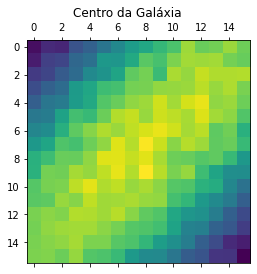

O brilho médio do centro da galáxia é: 1666.4410995420535


In [7]:
centro = simgs[64-8:64+8, 64-8:64+8]
plt.matshow(centro)
plt.suptitle('Centro da Galáxia')
plt.show()
print('O brilho médio do centro da galáxia é: '+str(np.mean(centro)))

    3- [MMC]

In [3]:
from time import time
def mc_integral_simple(func, xmin, xmax, npoints=100000):
    base = (xmax - xmin)
    x_sample = np.random.uniform(low=xmin, high=xmax, size=(npoints,))
    y_sample = np.apply_along_axis(func,0,x_sample)
    return np.mean(y_sample) * base

def f3a(x):
    return -1+np.sqrt(x)

def f3b(x):
    return np.exp(-x)

x = np.arange(0, 3+1/1000, 1/1000)

ta = time()
inta = mc_integral_simple(f3a, 0, 3)
tb = time()
intb = mc_integral_simple(f3b, 0, 3)
end = time()

print(tb-ta, end-tb)

print(f'Integral da função a: {inta}')
print(f'Integral da função b: {intb}')


0.013172626495361328 0.009270668029785156
Integral da função a: 0.46330519912839774
Integral da função b: 0.9548233154486765


    2- [Reamostragem]

In [2]:
n_populacao = 100000000
tamanhos_amostras = [1000,10000,100000] #como array deixava o codigo lento e as vezes crushava o kernel (??)
n_candidato_a = int(n_populacao*0.4) # Votos
n_candidato_b = int(n_populacao*0.31) # Votos
n_candidato_c = int(n_populacao*0.29) # Votos
votos_a = np.repeat('a',n_candidato_a) #Representação dos votos
votos_b = np.repeat('b',n_candidato_b) #de cada
votos_c = np.repeat('c',n_candidato_c) #candidato
votos_populacao = np.append(votos_a,np.append(votos_b,votos_c))
for j in range(3):
    np.random.shuffle(votos_populacao) #aleatorizar os votos

In [3]:
def hdr_simple(array,p):
    return np.array([np.quantile(array,(1-p)/2),np.quantile(array,1-(1-p)/2)])

In [4]:
amostras_p_bootstrap = [votos_populacao[np.random.randint(votos_populacao.size, size=i)] for i in tamanhos_amostras]
n_resamples = 100 #Cada uma das amostras, faremos n_resamples reamostragens

bootstrap_dists = [[np.random.choice(amostras_p_bootstrap[s], size=amostras_p_bootstrap[s].size, replace=True)
                    for i in range(n_resamples)] 
                   for s in range(3)] 
#distribuição bootstrap -- > pega amostra de 1.000 pessoas e sorteio (c reposição) 10.000 vezes e crio 10k novas amostras
# Verificar a porcentagem de cada candidato
bsporc_a = np.array([np.array([(bootstrap_dists[s][i][bootstrap_dists[s][i]=='a'].size/tamanhos_amostras[s])*100
                      for i in range(n_resamples)]) 
            for s in range(3)])
bsporc_b = np.array([np.array([(bootstrap_dists[s][i][bootstrap_dists[s][i]=='b'].size/tamanhos_amostras[s])*100
                      for i in range(n_resamples)]) 
            for s in range(3)])
bsporc_c = np.array([np.array([(bootstrap_dists[s][i][bootstrap_dists[s][i]=='c'].size/tamanhos_amostras[s])*100
                      for i in range(n_resamples)]) 
            for s in range(3)])
#Proporção --> contando quantas pessoas votaram no tal candidato em cada nova-amostragem que criamos acima

candidatos = np.array([bsporc_a, bsporc_b, bsporc_c])
errorbs = np.array([[hdr_simple(bs[s], 0.95) for s in range(3)] for bs in candidatos])

In [5]:
#Obter amostras e resultados diretamente da população original.
amostras_pop = [[np.random.choice(votos_populacao, size=s, replace=True)
                 for i in range(n_resamples)]
                for s in tamanhos_amostras]

porc_a = np.array([np.array([(amostras_pop[s][i][amostras_pop[s][i]=='a'].size/tamanhos_amostras[s])*100
                    for i in range(n_resamples)]) 
          for s in range(3)])
porc_b = np.array([np.array([(amostras_pop[s][i][amostras_pop[s][i]=='b'].size/tamanhos_amostras[s])*100
                    for i in range(n_resamples)]) 
          for s in range(3)])
porc_c = np.array([np.array([(amostras_pop[s][i][amostras_pop[s][i]=='c'].size/tamanhos_amostras[s])*100
                    for i in range(n_resamples)]) 
          for s in range(3)])
popabc = np.array([porc_a, porc_b, porc_c])
errorpop = np.array([[hdr_simple(pop[s], 0.95) for s in range(3)] for pop in popabc])

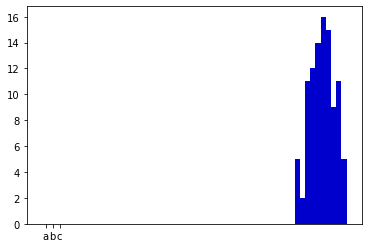

In [16]:
#me embolei no plot

In [17]:
#verificando se o intervalo de confiança obtidos pelo bootstrap são razoáveis.
(errorbs-errorpop)/errorpop

array([[[ 0.04684709,  0.01885246],
        [ 0.00542811, -0.00071038],
        [ 0.00488697,  0.0054229 ]],

       [[-0.07470215, -0.0604432 ],
        [-0.00597786,  0.00019644],
        [ 0.00048941,  0.0020744 ]],

       [[ 0.00177903,  0.05752318],
        [ 0.00461009,  0.00880568],
        [-0.01025998, -0.00811816]]])

    b)

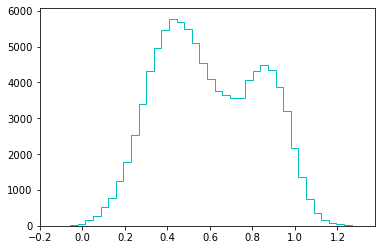

In [19]:
galaxias = np.loadtxt('sdss_hist.txt')
plt.hist(galaxias, 40, histtype='step', color='c')
plt.show()

In [20]:
dist = [np.random.choice(galaxias, size=10000, replace=True) for i in range(1000)]
passo = np.arange(0, 1.2, 1.2/40)
f = np.array([[(dist[s][np.logical_and(dist[s]>i, dist[s]<i+(1.2/40))].size) for s in range(1000)] for i in passo])
f.shape

(40, 1000)

In [21]:
picos1 = [1.2*(np.argmax(f[0:20, i]))+1/40 for i in range(1000)]
picos2 = [0.6 + (1.2*(np.argmax(f[20:, i])+1)/40) for i in range(1000)]
np.array(picos1).size

print(np.std(picos1))
print(np.std(picos2))

1.008796827909366
0.03192821792709386
